In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
def Net(A,p,q,r,s):
    n = np.shape(A)[0]
    if n != np.shape(A)[1] or (p != 0 and p != 1):
        return print('ERROR')
    T = False
    d = all(np.diag(A) == np.zeros(n))
    if ([q,r,s] == [0,0,0] or [q,r,s] == [0,0,1]) and d == True:
        T = True
        a = 1/n
        M = max(np.max(abs(A)),1)
        B = a*A/M
    if [q,r,s] == [1,0,1] and d == True:
        T = True
        a = 0.99
        D = np.diag(np.sum(abs(A),axis=0) + (np.sum(abs(A),axis=0) == 0)*1)
        B = a*A@np.linalg.inv(D)
    if [q,r,s] == [1,0,0] and d == True:
        T = True
        a = 1/n
        D = np.diag(np.max(abs(A),axis=0) + (np.max(abs(A),axis=0) == 0)*1)
        B = a*A@np.linalg.inv(D)
    if [q,r,s] == [0,1,1] and d == True:
        T = True
        a = 0.99
        D = np.diag(np.sum(abs(A),axis=1) + (np.sum(abs(A),axis=1) == 0)*1)
        B = a*np.linalg.inv(D)@A
    if [q,r,s] == [0,1,0] and d == True:
        T = True
        a = 1/n
        D = np.diag(np.max(abs(A),axis=1) + (np.max(abs(A),axis=1) == 0)*1)
        B = a*np.linalg.inv(D)@A
    if [q,r,s] == [1,1,0] and d == True:
        sdd = all(np.sum(abs(A),axis=0) < 1) or all(np.sum(abs(A),axis=1) < 1)
        if sdd == True:
            T = True
            B = np.copy(A)
    if [q,r,s] == [1,1,1] and np.max(abs(np.linalg.eig(A)[0])) < 1:
        T = True
        B = np.copy(A)
    if T == False:
        return print('ERROR')
    else:
        Mat = -(1-p)*np.eye(n) + np.linalg.inv(np.eye(n)-B)
        inVect = Mat@np.ones(n)
        outVect = np.ones(n)@Mat
        return [Mat,inVect,outVect]

In [3]:
monks = ['Romul\t','Bonaventure','Ambrose\t',
'Berthold','Peter\t','Louis\t','Victor\t',
'Winfrid\t','John\t','Gregory\t','Hugh\t',
'Boniface','Mark\t','Albert\t','Amand\t',
'Basil\t','Elias\t','Simplicius']

In [4]:
LK3 = np.array([
[0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0],
[0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0],
[0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0],
[0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0],
[0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0],
[0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0],
[0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1],
[0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1],
[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1],
[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0]]).transpose()

In [5]:
ES = np.array([
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0],
[0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
[1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
[0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0],
[0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0],
[0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0],
[0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1],
[0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1],
[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0]]).transpose()

In [6]:
IN = np.array([
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0],
[0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0],
[0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0],
[1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0],
[0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0],
[0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0],
[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1],
[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0]]).transpose()

In [7]:
PR = np.array([
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
[1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0],
[0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0],
[0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0],
[0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0],
[0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0],
[0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0]]).transpose()

In [8]:
DLK = np.array([
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1],
[0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0],
[0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0],
[0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0],
[0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0],
[0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0],
[0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0],
[0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0],
[0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0],
[0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0],
[0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
[1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0]]).transpose()

In [9]:
DES = np.array([
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1],
[0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0],
[0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0],
[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0],
[0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0],
[0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1],
[0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1],
[0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0],
[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1],
[0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0],
[0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0],
[0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
[1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0]]).transpose()

In [10]:
NIN = np.array([
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1],
[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1],
[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1],
[0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1],
[0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1],
[0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0],
[0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1],
[0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0],
[0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0],
[0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0],
[0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0],
[0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0],
[0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]]).transpose()

In [11]:
NPR = np.array([
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1],
[0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1],
[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1],
[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
[0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0],
[0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1],
[0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0],
[0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1],
[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1],
[0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]).transpose()

In [12]:
n = 18
A = np.sign(LK3+ES+IN+PR) - np.sign(DLK+DES+NIN+NPR)
net = Net(A,0,0,0,0)[1]
netrank = [net.tolist().index(np.sort(net)[i]) for i in range(n)]
for i in range(n):
    print(monks[netrank[i]],'\t',str(np.round(np.sort(net)[i],3)))

Basil	 	 -0.62
Simplicius 	 -0.594
Elias	 	 -0.55
Amand	 	 -0.326
Berthold 	 -0.059
Romul	 	 -0.041
Albert	 	 -0.03
Victor	 	 -0.017
Peter	 	 -0.005
Hugh	 	 0.008
Louis	 	 0.013
Mark	 	 0.136
Boniface 	 0.173
Gregory	 	 0.29
Winfrid	 	 0.291
Ambrose	 	 0.301
John	 	 0.324
Bonaventure 	 0.527


In [13]:
def dX_dt(X,t=0):
    return X*(A@X-np.sum(A*np.outer(X,X)))

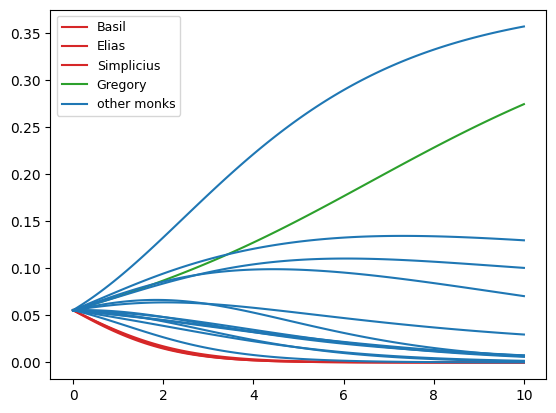

In [14]:
# Replicator dynamics short term
T = 10
X0 = np.ones(n)/n
t = np.linspace(0,T,10*T+1)
X = integrate.odeint(dX_dt,X0,t)
plt.plot(t,X[:,15],label='Basil',color='tab:red')
plt.plot(t,X[:,16],label='Elias',color='tab:red')
plt.plot(t,X[:,17],label='Simplicius',color='tab:red')
plt.plot(t,X[:,9],label='Gregory',color='tab:green')
plt.plot(t,X[:,14],label='other monks',color='tab:blue')
for i in range(1,14):
    if i != 9:
        plt.plot(t,X[:,i],color='tab:blue')
plt.legend(loc='upper left',fontsize="9")
plt.show()

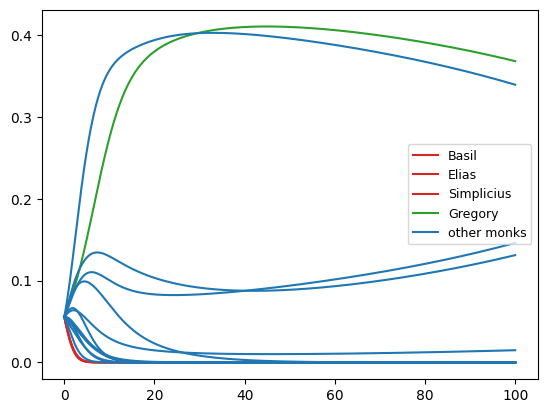

In [15]:
# Replicator dynamics mid term
T = 100
X0 = np.ones(n)/n
t = np.linspace(0,T,10*T+1)
X = integrate.odeint(dX_dt,X0,t)
plt.plot(t,X[:,15],label='Basil',color='tab:red')
plt.plot(t,X[:,16],label='Elias',color='tab:red')
plt.plot(t,X[:,17],label='Simplicius',color='tab:red')
plt.plot(t,X[:,9],label='Gregory',color='tab:green')
plt.plot(t,X[:,14],label='other monks',color='tab:blue')
for i in range(1,14):
    if i != 9:
        plt.plot(t,X[:,i],color='tab:blue')
plt.legend(loc='center right',fontsize="9")
plt.show()

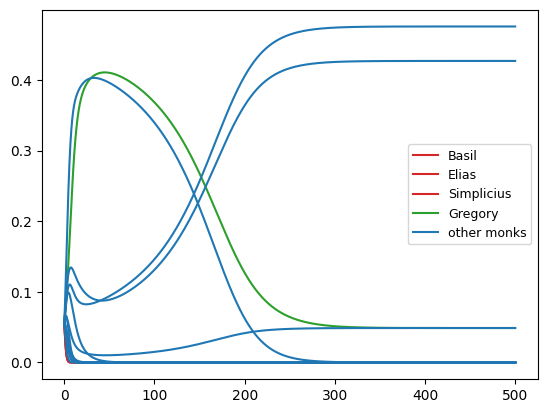

In [16]:
# Replicator dynamics long term
T = 500
X0 = np.ones(n)/n
t = np.linspace(0,T,10*T+1)
X = integrate.odeint(dX_dt,X0,t)
plt.plot(t,X[:,15],label='Basil',color='tab:red')
plt.plot(t,X[:,16],label='Elias',color='tab:red')
plt.plot(t,X[:,17],label='Simplicius',color='tab:red')
plt.plot(t,X[:,9],label='Gregory',color='tab:green')
plt.plot(t,X[:,14],label='other monks',color='tab:blue')
for i in range(1,14):
    if i != 9:
        plt.plot(t,X[:,i],color='tab:blue')
plt.legend(loc='center right',fontsize="9")
plt.show()